In [69]:
data_folder = './reuters21578/'

sgml_number_of_files = 21
sgml_file_name_template = 'reut2-NNN.sgm'

# Category files
category_files = {
    'to_': ('Topics', 'all-topics-strings.lc.txt'),
    'pl_': ('Places', 'all-places-strings.lc.txt'),
    'pe_': ('People', 'all-people-strings.lc.txt'),
    'or_': ('Organizations', 'all-orgs-strings.lc.txt'),
    'ex_': ('Exchanges', 'all-exchanges-strings.lc.txt')
}

# Word2Vec number of features
num_features = 500
# Limit each newsline to a fixed number of words
# document_max_num_words = 100
# Selected categories
# selected_categories = ['pl_usa']

In [70]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [71]:
# Create category dataframe

# Read all categories
category_data = []

for category_prefix in category_files.keys():
#     print(category_files[category_prefix][1])
#     print(data_folder)
    with open(data_folder + category_files[category_prefix][1], 'r') as file:
        for category in file.readlines():
            category_data.append([category_prefix + category.strip().lower(), 
                                  category_files[category_prefix][0]])

# Create category dataframe
news_categories = pd.DataFrame(data=category_data)

# print "category_data: ", category_data
# (news_categories.values).tolist()

In [72]:
import re
import xml.sax.saxutils as saxutils
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/prabha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
def to_category_vector(categories):
    vector = zeros(len(categories)).astype(float32)
    
    for i in range(len(categories)):
        if target_categories[i] in categories:
            vector[i] = 1.0
    
    return vector

In [74]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
# strip_special_chars = re.compile("[^A-Za-z0-9 ]+")
# stop_words = set(stopwords.words("english"))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;\\n]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def cleanUpSentence(r):#, stop_words = None#
    r = r.lower().replace("<br />", " ")
#     r = r.lower() # lowercase text
    r = REPLACE_BY_SPACE_RE.sub(' ', r)
    r = BAD_SYMBOLS_RE.sub('', r)
#     r = re.sub(strip_special_chars, "", r.lower())
    r = ' '.join(word for word in r.split() if word not in STOPWORDS)
#     if stop_words is not None:
    words = word_tokenize(r)
#         filtered_sentence = []
    for w in words:
        w = lemmatizer.lemmatize(w)
#             if w not in stop_words:
#                 filtered_sentence.append(w)
#         return " ".join(filtered_sentence)
#     else:
    return r

In [75]:
# Parse SGML files
document_X = {}
document_Y = {}
docid_traintest = {}
def strip_tags(text):
    return re.sub('<[^<]+?>', '', text).strip()

def unescape(text):
    return saxutils.unescape(text)

# Iterate all files
for i in range(sgml_number_of_files):
    if i < 10:
        seq = '00' + str(i)
    else:
        seq = '0' + str(i)
        
    file_name = sgml_file_name_template.replace('NNN', seq)
    print('Reading file: %s' % file_name)
    data_folder + file_name
    with open(data_folder + file_name, 'rb') as file:
    
        content = BeautifulSoup(file.read().lower(),'html.parser')

        for newsline in content('reuters'):
            document_categories = []

            # News-line Id
            document_id = newsline['newid']
    #             print document_id,
            train_test = newsline['lewissplit']
            docid_traintest[document_id] = train_test
    #             print "train_test: ",train_test

            # News-line text
            document_body = strip_tags(str(newsline('text')[0].body)).replace('reuter\n&#3;', '')
            doc_categories=strip_tags(str(newsline('topics')[0].body))
            doc_categories = unescape(doc_categories)

            document_body = unescape(document_body)

            # News-line categories
            topics = newsline.topics.contents
            places = newsline.places.contents
            people = newsline.people.contents
            orgs = newsline.orgs.contents
            exchanges = newsline.exchanges.contents

            for topic in topics:
                document_categories.append('to_' + strip_tags(str(topic)))

            for place in places:
                document_categories.append('pl_' + strip_tags(str(place)))

            for person in people:
                document_categories.append('pe_' + strip_tags(str(person)))

            for org in orgs:
                document_categories.append('or_' + strip_tags(str(org)))

            for exchange in exchanges:
                document_categories.append('ex_' + strip_tags(str(exchange)))
    #             print "document_categories: ",document_categories
            # Create new document    
    #             update_frequencies(document_categories)

            document_X[document_id] = document_body
            document_Y[document_id] = document_categories
# print(document_Y)
one_hot_label=[]
for key,v in document_Y.items():
    dict_temp={'Topics':0,'Places':0,'Peoples':0,'Exchanges':0,'Organizations':0}
    for i in v:
        string=i.split('_')
        category=string[0]
        if category=='to':
            dict_temp['Topics']+=1
        if category=='pl':
            dict_temp['Places']+=1
        if category=='ex':
            dict_temp['Exchanges']+=1
        if category=='or':
            dict_temp['Organizations']+=1
        if category=='pe':
            dict_temp['Peoples']+=1
    one_hot_label.append(dict_temp)
    
# print(one_hot_label)
ranking=[]
for i in one_hot_label:
    ranking.append(list(i.values()))
# print(np.array(ranking).shape)
# print(document_X)


Reading file: reut2-000.sgm
Reading file: reut2-001.sgm
Reading file: reut2-002.sgm
Reading file: reut2-003.sgm
Reading file: reut2-004.sgm
Reading file: reut2-005.sgm
Reading file: reut2-006.sgm
Reading file: reut2-007.sgm
Reading file: reut2-008.sgm
Reading file: reut2-009.sgm
Reading file: reut2-010.sgm
Reading file: reut2-011.sgm
Reading file: reut2-012.sgm
Reading file: reut2-013.sgm
Reading file: reut2-014.sgm
Reading file: reut2-015.sgm
Reading file: reut2-016.sgm
Reading file: reut2-017.sgm
Reading file: reut2-018.sgm
Reading file: reut2-019.sgm
Reading file: reut2-020.sgm


In [76]:
## rough
col_names = ['body', 'categories', 'word_count']
dataset = pd.DataFrame(columns = col_names)
print(dataset.head())

Empty DataFrame
Columns: [body, categories, word_count]
Index: []


In [77]:
# data preprocessing

In [78]:
# data preprocessing
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')
def create_x_matrix(document_X):
    totalX = []
    for i, doc in document_X.items():
        totalX.append(cleanUpSentence(doc))
    max_vocab_size = 200
    input_tokenizer = Tokenizer(200)
    input_tokenizer.fit_on_texts(totalX)
    encoded_docs = input_tokenizer.texts_to_matrix(totalX, mode='count')
    return totalX,encoded_docs

totalX,encoded_docs=create_x_matrix(document_X)


##dataset
dataset['body'] = totalX
dataset['categories'] = ranking
dataset['word_count'] = dataset['body'].apply(lambda x: len(str(x).split(" ")))
print (dataset.head())
print (dataset.word_count.describe())

[nltk_data] Downloading package punkt to /home/prabha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/prabha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                body       categories  \
0  showers continued throughout week bahia cocoa ...  [1, 3, 0, 0, 0]   
1  standard oil co bp north america inc said plan...  [0, 1, 0, 0, 0]   
2  texas commerce bancshares incs texas commerce ...  [0, 1, 0, 0, 0]   
3  bankamerica corp pressure act quickly proposed...  [0, 2, 0, 0, 0]   
4  us agriculture department reported farmerowned...  [6, 1, 0, 0, 0]   

   word_count  
0         356  
1          48  
2          35  
3         274  
4         122  
count    21000.000000
mean        80.506429
std         84.612772
min          1.000000
25%         33.000000
50%         58.000000
75%        100.000000
max       1925.000000
Name: word_count, dtype: float64


In [79]:
#Identify common words
freq = pd.Series(' '.join(dataset['body']).split()).value_counts()[:20]
freq

said       51915
mln        24565
dlrs       19993
reuter     18449
pct        16718
vs         13651
000        12661
billion     9936
year        9831
would       9024
us          8615
cts         8384
company     7993
bank        6550
new         6331
inc         6312
last        5758
net         5710
1986        5525
corp        5453
dtype: int64

In [80]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset ['body']).split()).value_counts()[-20:]
freq1

telkom                 1
highprofile            1
reissue                1
confectionary          1
663492                 1
asamoah                1
workgroup              1
massbased              1
bowaters               1
7273                   1
tattered               1
effecitve              1
europharmaceuticals    1
amministrazioni        1
agreemement            1
ninetyseven            1
12427                  1
arroba                 1
conrads                1
bellport               1
dtype: int64

In [81]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

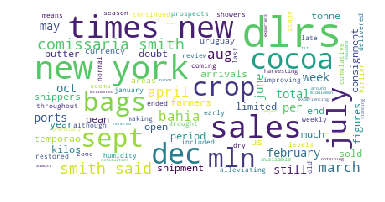

In [82]:
corpus = dataset.iloc[0]['body']
stop_words = set(STOPWORDS) 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
# import math

# def softmax(z):
#     z_exp = [math.exp(i) for i in z]
#     sum_z_exp = sum(z_exp)
#     return [i / sum_z_exp for i in z_exp]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout,Embedding
max_vocab_size = 200
nn = Sequential()
nn.add(Embedding(1000, 20, input_length=max_vocab_size))
nn.add(Dense(10, activation="relu", input_shape=(max_vocab_size,)))
nn.add(Dropout(0.15))
nn.add(Flatten()) 
nn.add(Dense(5,activation="softmax"))
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn.fit(np.array(encoded_docs), np.array(ranking), batch_size=10, epochs=5,
          verbose=1, validation_split=0.2)

Train on 16800 samples, validate on 4200 samples
Epoch 1/5
 7720/16800 [============>.................] - ETA: 7s - loss: 1.6089 - acc: 0.5868

In [ ]:
# Iterate all files
document_X={}
document_Y={}
for i in range(21,22):
    if i < 10:
        seq = '00' + str(i)
    else:
        seq = '0' + str(i)
        
    file_name = sgml_file_name_template.replace('NNN', seq)
    print('Reading file: %s' % file_name)
    #data_folder + file_name
    with open(data_folder+file_name, 'rb') as file:
        content = BeautifulSoup(file.read().lower(),'html.parser')

        for newsline in content('reuters'):
            document_categories = []

            # News-line Id
            document_id = newsline['newid']
        #             print document_id,
            train_test = newsline['lewissplit']
            docid_traintest[document_id] = train_test
        #             print "train_test: ",train_test

            # News-line text
            document_body = strip_tags(str(newsline('text')[0].body)).replace('reuter\n&#3;', '')
            doc_categories=strip_tags(str(newsline('topics')[0].body))
            doc_categories = unescape(doc_categories)

            document_body = unescape(document_body)

            # News-line categories
            topics = newsline.topics.contents
            places = newsline.places.contents
            people = newsline.people.contents
            orgs = newsline.orgs.contents
            exchanges = newsline.exchanges.contents

            for topic in topics:
                document_categories.append('to_' + strip_tags(str(topic)))

            for place in places:
                document_categories.append('pl_' + strip_tags(str(place)))

            for person in people:
                document_categories.append('pe_' + strip_tags(str(person)))

            for org in orgs:
                document_categories.append('or_' + strip_tags(str(org)))

            for exchange in exchanges:
                document_categories.append('ex_' + strip_tags(str(exchange)))
        #             print "document_categories: ",document_categories
            # Create new document    
        #             update_frequencies(document_categories)

            document_X[document_id] = document_body
            document_Y[document_id] = document_categories


In [ ]:
test_total_X,test_encoded_X=create_x_matrix(document_X)
y=nn.predict(test_encoded_X)
print(y)
output=[]
for i in y:
    dict_temp={'Topics':i[0],'Places':i[1],'Peoples':i[2],'Exchanges':i[3],'Organizations':i[4]}
    output.append(dict_temp)   
    
ranked_output=[]
for i in output:
    t={}
    for key, value in sorted(i.items(), key=lambda item: item[1]):
        t[key]=value
    rank=0
    for k in t.keys():
        t[k]=rank
        rank+=1
    ranked_output.append(t)

print(ranked_output)